In [1]:
import numpy as np
import matplotlib.pyplot as plt

D* =  5.078316500347116 theta_cr =  0.04760121000595028
s:  2.5803310613437196
Dstar: 5.078316500347116 ws: 0.028741209358532284 wstar:  1.4148984883360337e-06
Tauc = 0.18947221331675956
6.0
[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  9.   9.5 10. ]
[3.         2.4        2.         1.71428571 1.5        1.33333333
 1.2        1.09090909 1.         0.92307692 0.85714286 0.8
 0.75       0.70588235 0.66666667 0.63157895 0.6       ]
[0.75       0.82191781 0.85714286 0.86597938 0.85714286 0.8372093
 0.81081081 0.78106509 0.75       0.71889401 0.68852459 0.65934066
 0.63157895 0.60534125 0.58064516 0.55745721 0.53571429]


Text(0.5, 1.0, 'Constant A = 6.0 m$^2$')

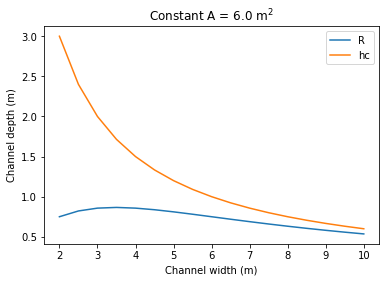

In [35]:
g=9.81
D50 = 250e-6
rhow = 1027.
rhos = 2650.
s = rhos/rhow
nu = 1.36e-6
Dstar = D50 *((s-1)*g/nu**2.)**(1./3.)
theta_cr = (0.3/(1.+1.2*Dstar))+0.055*(1.-np.exp(-0.020*Dstar)) # Soulsby eqn 77
print('D* = ',Dstar, 'theta_cr = ', theta_cr)
print('s: ',s)
ws = (nu/D50)*(np.sqrt(10.36**2+1.049*Dstar**3)-10.36) # Soulsby eqn 102
wstar = ws/((g*(s-1)/nu**2)**(1./3.))
print('Dstar:',Dstar,'ws:',ws,'wstar: ',wstar)

tauc = theta_cr*(g*rhow*(s-1)*D50)
print('Tauc =',tauc)

A = 2.*3.
b = np.arange(2.,10.5,.5)
hc = A/b
R = A/(2.*hc+b)





plt.plot(b,R, label='R')
plt.plot(b,hc,label='hc')
plt.legend()
plt.xlabel('Channel width (m)')
plt.ylabel('Channel depth (m)')
ts = 'Constant A = {} m$^2$'.format(A)
plt.title(ts)

theta_crit 0.04760121000595028
Uc: [0.78770959 0.7702819  0.75604244 0.74400316 0.73357425 0.7243753
 0.71614656 0.70870276 0.70190711 0.69565571 0.68986782 0.68447942
 0.67943891 0.67470408 0.67023996 0.66601727 0.66201123]
Cdn: [0.00425117 0.00457944 0.00486638 0.00512296 0.00535614 0.00557061
 0.00576973 0.00595597 0.00613125 0.00629704 0.00645453 0.00660469
 0.00674831 0.00688607 0.00701853 0.00714617 0.0072694 ]
tau0: [2.3800389  2.89674475 3.25539534 3.47422912 3.58302619 3.61139731
 3.58405843 3.51989388 3.43261008 3.33183365 3.22416797 3.11405255
 3.0044102  2.89711479 2.79332171 2.69369834 2.59858349]


Text(0.5, 1.0, 'slope = 0.05/100, $A$ = 6 m^2')

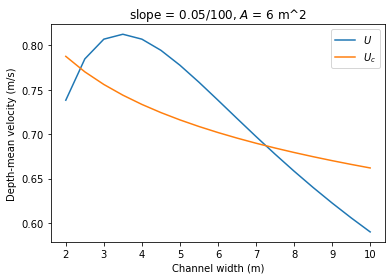

In [67]:
slope=.05/100.
n = 0.025
U = (1/n)*R**(2./3.)*slope**(1./2.)

# https://www.leovanrijn-sediment.com/papers/Formulaesandtransport.pdf
theta_crit = 0.3/(1+1.2*Dstar) + 0.055*(1-np.exp(-0.02*Dstar))
print('theta_crit',theta_crit)
Uc = 5.75*np.log(12*hc/(6*D50))*np.sqrt(theta_crit*(s-1)*g*D50)

print('Uc:',Uc)
Froude = U/np.sqrt(g*hc)
Cdn =   g*n**2/(hc**(1./3.))
tau0   = Cdn*rhow*U**2.
print('Cdn:',Cdn)
print('tau0:',tau0)


plt.plot(b,U,label=r'$U$')
plt.plot(b,Uc,label=r'$U_c$')

plt.xlabel('Channel width (m)')
plt.ylabel('Depth-mean velocity (m/s)')
plt.legend()
ts = r'slope = 0.05/100, $A$ = 6 m^2'
plt.title(ts)

### Take a different tack: compute bottom stress directly from slope
$m$

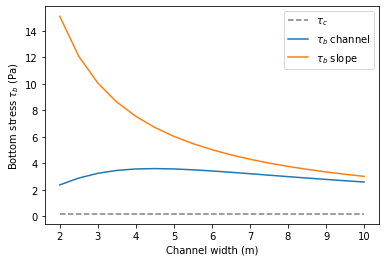

In [71]:
slope = .05/100
taub = rhow*g*hc*slope
plt.plot(b,np.ones_like(b)*tauc,'--',c='gray',label=r'$\tau_c$')
plt.plot(b,tau0,label=r'$\tau_b$ channel')
plt.plot(b,taub,label=r'$\tau_b$ slope')
plt.xlabel('Channel width (m)')
plt.ylabel(r'Bottom stress $\tau_b$ (Pa)')
plt.legend()